In [1]:
# lets import the processed data
import pandas as pd


In [2]:
emp_df=pd.read_csv('processed_emp_data.csv')
emp_df.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition
0,41,446,1,2,606,2,4,470,5993,8,1,6,1
1,49,961,8,1,606,3,2,673,5130,1,3,10,0
2,37,961,2,2,82,4,3,470,2090,6,3,0,1
3,33,961,3,4,606,4,3,673,2909,1,3,8,0
4,27,961,2,1,464,1,2,673,3468,9,3,2,0


In [3]:
# lets try Logistic Regression using GridSearchCV 
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

In [4]:
# # lets try logistic regression using GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# identifying X and y
X=emp_df.drop(['Attrition'],axis=1)
y=emp_df['Attrition']
# # define model
# lg_model = LogisticRegression()
# # define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define search space
# space = dict()
# space['solver'] = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
# space['penalty'] = ['l1', 'l2', 'elasticnet']
# space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# # define search
# search = GridSearchCV(lg_model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# # execute search
# result = search.fit(X, y)
# # summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)

In [5]:
# lets cross verfiy the result using train test split approach
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 12)
(294, 12)
(1176,)
(294,)


In [6]:
# lets fit the model with the data
from sklearn.linear_model import LogisticRegression
lg_model1=LogisticRegression(C=1e-05,penalty='none',solver='newton-cg')
lg_model1.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=1e-05, penalty='none', solver='newton-cg')

In [7]:
# prediction on y
y_train_pred=lg_model1.predict(X_train)
y_test_pred=lg_model1.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#accuracy check on train and test data
print('accuracy score of training data for logreg model1: ',accuracy_score(y_train,y_train_pred))
print('accuracy score of testing data for logreg model1: ',accuracy_score(y_test,y_test_pred))

accuracy score of training data for logreg model1:  0.8418367346938775
accuracy score of testing data for logreg model1:  0.8435374149659864


In [9]:
# lets check the prediction
pd.DataFrame({'Actual y_test': y_test , 'Predicted y_test' : y_test_pred})

,Actual y_test,Predicted y_test
427,0,0
1210,0,0
771,0,0
1126,0,0
750,0,0
...,...,...
896,0,0
282,0,0
36,1,0
1156,0,0


In [10]:
# confusion matrix
print(confusion_matrix(y_test,y_test_pred))

[[247   0]
 [ 46   1]]


In [11]:
# classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       1.00      0.02      0.04        47

    accuracy                           0.84       294
   macro avg       0.92      0.51      0.48       294
weighted avg       0.87      0.84      0.78       294



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.761


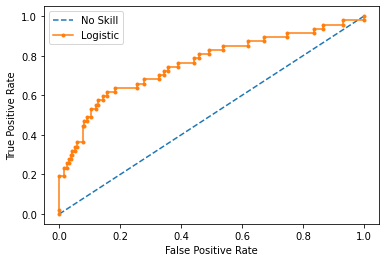

In [12]:
# lets plot roc curve and find auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
# predict probabilities
lr_probs = lg_model1.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [13]:
# # lets try logistic regression with RandomizedSearchCV
# from scipy.stats import loguniform
# from sklearn.model_selection import RandomizedSearchCV
# # define model
# model = LogisticRegression()
# # define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define search space
# space = dict()
# space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
# space['penalty'] = ['l1', 'l2', 'elasticnet']
# space['C'] = loguniform(1e-5, 100)
# # define search
# search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# # execute search
# result = search.fit(X, y)
# # summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)

In [14]:
# lets cross verfiy the result using train test split approach
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=21)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1176, 12)
(294, 12)
(1176,)
(294,)


In [15]:
# lets fit the model with the data
lg_model2=LogisticRegression(C=22.89528512932599,penalty='l1',solver='liblinear')
lg_model2.fit(X_train1,y_train1)

LogisticRegression(C=22.89528512932599, penalty='l1', solver='liblinear')

In [16]:
# prediction on y
y_train_pred1=lg_model2.predict(X_train1)
y_test_pred1=lg_model2.predict(X_test1)

In [17]:
#accuracy check on train and test data
print('accuracy score of training data for logreg model1: ',accuracy_score(y_train1,y_train_pred1))
print('accuracy score of testing data for logreg model1: ',accuracy_score(y_test1,y_test_pred1))

accuracy score of training data for logreg model1:  0.842687074829932
accuracy score of testing data for logreg model1:  0.8435374149659864


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.761


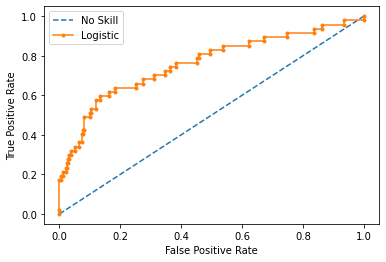

In [18]:
# lets plot roc curve and find auc score
# predict probabilities
lr_probs = lg_model2.predict_proba(X_test1)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test1))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test1, ns_probs)
lr_auc = roc_auc_score(y_test1, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test1, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [20]:
# lets save the model
import pickle
file=open('logreg_model.pkl','wb')
pickle.dump(lg_model2,file)
file.close()